In [1]:
from basketball.common.team import TeamClassifier

cf = TeamClassifier()

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


In [2]:
# open images in bball
from ultralytics import YOLO
import cv2

model = YOLO("weights.pt")


In [3]:
from pathlib import Path

train_dir = Path("boxball-roblox/train/images/")

In [ ]:
crops = []
player_label = 1

img = cv2.imread("/Users/anishthewizard/Documents/Programming/Zephyr_Basketball/boxball-roblox/train/images/youtube-1_jpg.rf.1e6a27648d701c17c9c0161fce3e305e.jpg")
result = model.predict(conf=0.8, source="/Users/anishthewizard/Documents/Programming/Zephyr_Basketball/boxball-roblox/train/images/youtube-1_jpg.rf.1e6a27648d701c17c9c0161fce3e305e.jpg")

for res in result:
    if res.boxes:
        boxes = result[0].boxes.xyxy
        class_ids = result[0].boxes.cls
        
        for i, box in enumerate(boxes):
            if class_ids[i].item() == player_label:
                x1, y1, x2, y2 = map(int, box[:4])
                crop = img[y1:y2, x1:x2]
                
                if crop.size > 0:
                    crops.append(crop)


image 1/1 /Users/anishthewizard/Documents/Programming/Zephyr_Basketball/boxball-roblox/train/images/youtube-1_jpg.rf.1e6a27648d701c17c9c0161fce3e305e.jpg: 640x640 10 Players, 2 Refs, 93.0ms
Speed: 3.4ms preprocess, 93.0ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)


In [ ]:
cf.fit(crops)

Embedding extraction: 1it [00:00,  2.11it/s]


In [20]:
cf.predict([crops[5], crops[1]])

Embedding extraction: 1it [00:00,  6.01it/s]


array([0, 1], dtype=int32)

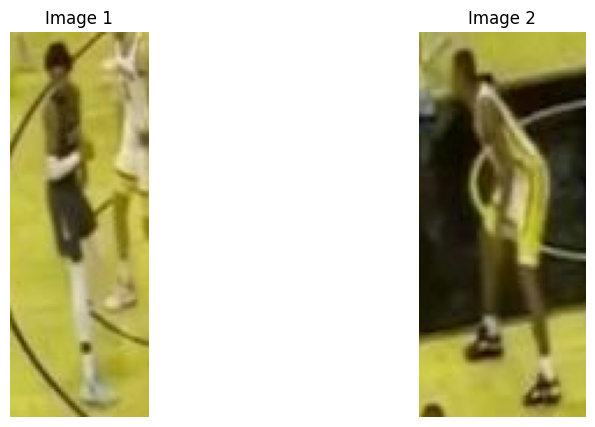

In [26]:
from matplotlib import pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(cv2.cvtColor(crops[5], cv2.COLOR_BGR2RGB))
axes[0].set_title("Image 1")
axes[0].axis("off")

axes[1].imshow(cv2.cvtColor(crops[1], cv2.COLOR_BGR2RGB))
axes[1].set_title("Image 2")
axes[1].axis("off")

plt.show()
